<a href="https://colab.research.google.com/github/Bahaakhalled/Bahaakhalled.github.io/blob/main/MushroomClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mushroom Classification
---

---


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import CSV

In [4]:
mushroom=pd.read_csv('mushrooms.csv')
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mushroom.shape

(8124, 23)

In [23]:
cols=mushroom.columns

In [20]:
mushroom.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [22]:
mushroom.duplicated().sum()

0

In [32]:
mushroom.nunique(axis=0).sort_values(ascending=True)

veil-type                    1
class                        2
bruises                      2
gill-attachment              2
gill-spacing                 2
gill-size                    2
stalk-shape                  2
ring-number                  3
cap-surface                  4
veil-color                   4
stalk-surface-below-ring     4
stalk-surface-above-ring     4
ring-type                    5
stalk-root                   5
cap-shape                    6
population                   6
habitat                      7
stalk-color-above-ring       9
stalk-color-below-ring       9
odor                         9
spore-print-color            9
cap-color                   10
gill-color                  12
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


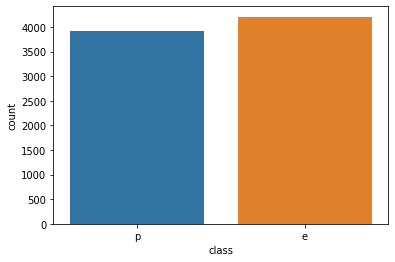

In [34]:
sns.countplot(mushroom['class'])

In [58]:
cleanups = {"class":                          {"p": "Poisonous", "e": "Edible"},
               "cap-shape":                   { "b": "bell","x" : "convex" , "c" : "conical", "f" : "flat" , "k" : "knobbed" , "s" : "sunken"},
                "cap-surface":                {"f" : "fibrous" , "g" : "grooves" , "y" : "scaly" , "s" : "smooth"},
                "bruises":                    {  "t" : "Yes" ,"f" : "No" },
                "cap-color":                  {"n" : "brown","b" : "buff","c" : "cinnamon","g" : "gray","r" : "green","p" : "pink","u" : "purple","e" : "red","w" : "white","y" : "yellow"},
                "odor"  :                     {"a" : "almond","l" : "anise","c" : "creosote","y" : "fishy","f" : "foul","m" : "musty","n" : "none","p" : "pungent","s" : "spicy"},
                "gill-attachment" :           {"a": "attached","d" : "descending","f" : "free","n" : "notched"},
                "gill-spacing" :              {"c" : "close","w" : "crowded","d" : "distant"},
                "gill-size" :                 {"b" : "broad","n" : "narrow"},
                "gill-color":                 {"k" : "black","n" : "brown","b" : "buff","h" : "chocolate","g" : "gray" , "r" : "green","o" : "orange","p" : "pink","u" : "purple","e" : "red","w": "white","y" : "yellow"},
                "stalk-shape" :               {"e": "enlarging","t" : "tapering"},
                "stalk-root":                 {"b" : "bulbous","c" : "club","u" : "cup","e" : "equal","z" : "rhizomorphs","r" : "rooted","NA" : "?"},
                "stalk-surface-above-ring":   {"f" : "fibrous","y" : "scaly","k" : "silky","s" : "smooth"},
                "stalk-surface-below-ring" :  {"f" : "fibrous","y" : "scaly","k" : "silky","s" : "smooth"},
                "stalk-color-above-ring":     {"n" : "brown","b" : "buff","c" : "cinnamon","g" : "gray","o" : "orange","p" : "pink","e" : "red","w" : "white","y" : "yellow"},
                "stalk-color-below-ring":     {"n" : "brown","b" : "buff","c" : "cinnamon","g" : "gray","o" : "orange","p" : "pink","e" : "red","w" : "white","y" : "yellow"},
                "veil-type":                  {"p" : "partial","u" : "universal"},
                "veil-color":                 {"n" : "brown","o" : "orange","w" : "white","y" : "yellow"},
                "ring-number":                {"n" : "none","o" : "one","t" : "two"},
                "ring-type":                  {"c" : "cobwebby","e" : "evanescent","f" : "flaring","l" : "large","n" :"none","p" : "pendant","s" : "sheathing","z" : "zone"},
                "spore-print-color":          {"k" : "black","n" : "brown","b" : "buff","c" : "cinnamon","g" : "gray","o" : "orange","p" : "pink","e" : "red","w" : "white","y" : "yellow"},
                "population":                 {"a" : "abundant","c" : "clustered","n" : "numerous","s" : "scattered","v" : "several","y" : "solitary"},
                "habitat":                    {"g" : "grasses","l" :"leaves","m" : "meadows","p" : "paths","u" :"urban","w" : "waste","d" : "woods"}
            }
                
mushroom=mushroom.replace(cleanups)

In [61]:
mushroom.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,convex,smooth,brown,Yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,Edible,convex,smooth,yellow,Yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,Edible,bell,smooth,white,Yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,Poisonous,convex,scaly,white,Yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,Edible,convex,smooth,gray,No,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [68]:
mushroom.rename(columns = {'class':'Result'},inplace=True)